In [33]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [34]:
image = mpimg.imread("test.jpg")

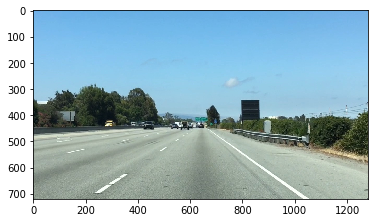

In [35]:
plt.imshow(image)
plt.show()

In [36]:
xsize = image.shape[1]
ysize = image.shape[0]

print(xsize, ysize)

1280 720


In [37]:
color_select = np.copy(image)
line_image = np.copy(image)

In [38]:
red_threshold = green_threshold = blue_threshold = 200

In [39]:
rgb_threshold = [red_threshold, green_threshold, blue_threshold]
print(rgb_threshold)

[200, 200, 200]


In [40]:
left_bottom = [40, 539]
right_bottom = [900, 600]
apex = [450, 300]
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [41]:
# for finding lanes
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [42]:
# for finding region
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

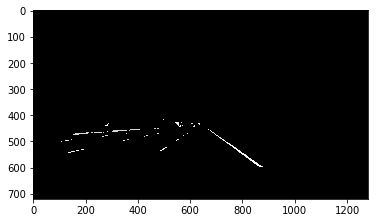

In [43]:
# make everything except the not region(False's) and non lanes
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
plt.imshow(color_select)
plt.show()

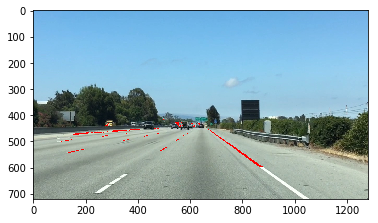

In [44]:
# ~color_thresholds = lanes & region_thresholds = True
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
plt.imshow(line_image)
plt.show()

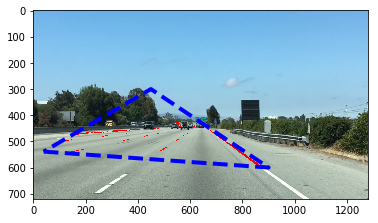

In [45]:
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)

plt.show()